<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


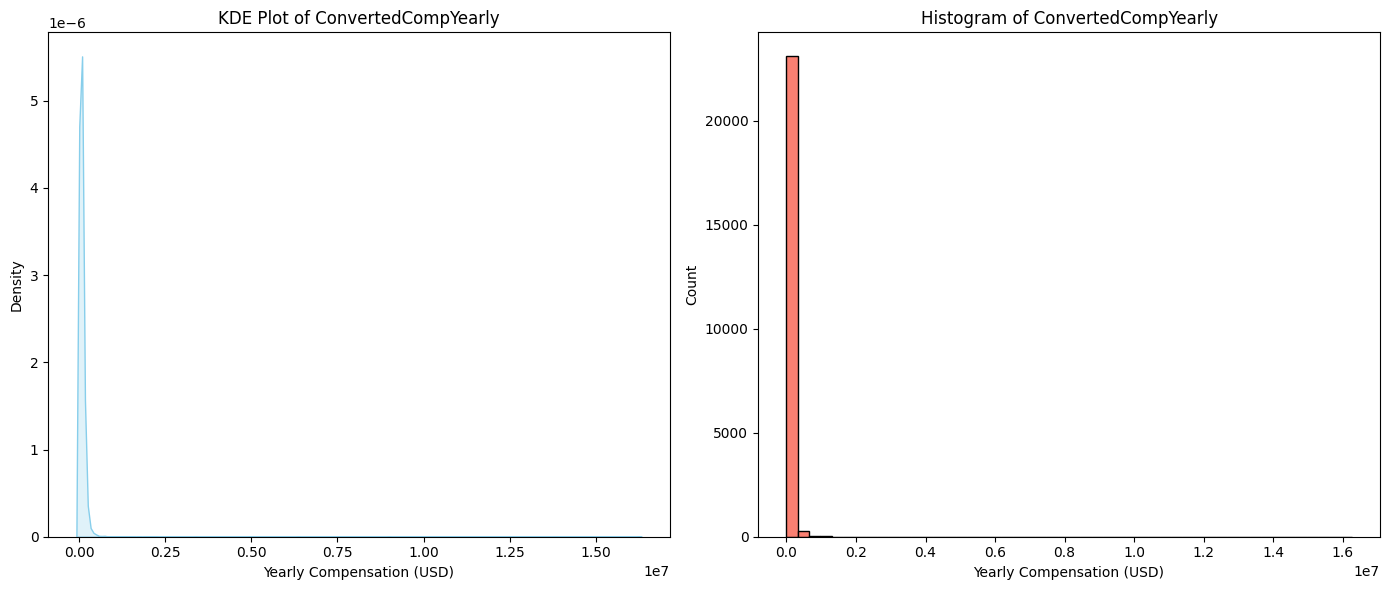

In [3]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing compensation values
comp_data = df['ConvertedCompYearly'].dropna()

# Set up the plotting area
plt.figure(figsize=(14, 6))

# Plot KDE (distribution plot)
plt.subplot(1, 2, 1)
sns.kdeplot(comp_data, fill=True, color='skyblue')
plt.title('KDE Plot of ConvertedCompYearly')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Density')

# Plot Histogram
plt.subplot(1, 2, 2)
plt.hist(comp_data, bins=50, color='salmon', edgecolor='black')
plt.title('Histogram of ConvertedCompYearly')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [4]:
## Write your code here
# Step 1: Filter rows where Employment is "Employed, full-time"
full_time_df = df[df['Employment'] == 'Employed, full-time']

# Step 2: Drop missing compensation values
comp_ft = full_time_df['ConvertedCompYearly'].dropna()

# Step 3: Calculate the median
median_full_time_comp = comp_ft.median()

# Step 4: Display result
print(f"✅ Median Yearly Compensation for Full-Time Employees: ${median_full_time_comp:,.2f}")


✅ Median Yearly Compensation for Full-Time Employees: $69,814.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



/tmp/ipykernel_774/4278154404.py:24: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


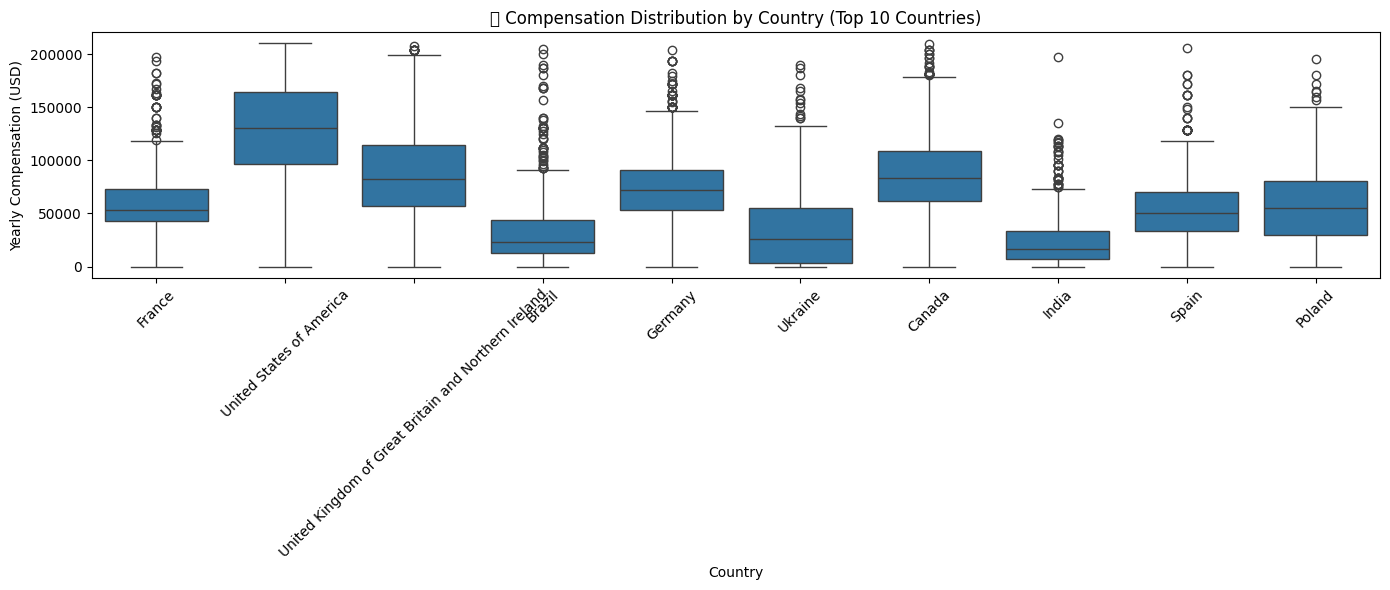

In [5]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Drop rows with missing compensation or country values
df_country_comp = df[['Country', 'ConvertedCompYearly']].dropna()

# Step 2: Filter out extreme compensation values to focus the visualization
# Optionally remove outliers above 95th percentile for cleaner plots
percentile_95 = df_country_comp['ConvertedCompYearly'].quantile(0.95)
df_country_comp = df_country_comp[df_country_comp['ConvertedCompYearly'] <= percentile_95]

# Step 3: Select top 10 countries by respondent count
top_countries = df_country_comp['Country'].value_counts().nlargest(10).index
df_top_countries = df_country_comp[df_country_comp['Country'].isin(top_countries)]

# Step 4: Create box plot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top_countries, x='Country', y='ConvertedCompYearly')
plt.xticks(rotation=45)
plt.title('💰 Compensation Distribution by Country (Top 10 Countries)')
plt.ylabel('Yearly Compensation (USD)')
plt.xlabel('Country')
plt.tight_layout()
plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [6]:
## Write your code here
import pandas as pd

# Step 1: Drop NaNs from the compensation column
df_clean = df[['ConvertedCompYearly']].dropna()

# Step 2: Calculate IQR (Interquartile Range)
Q1 = df_clean['ConvertedCompYearly'].quantile(0.25)
Q3 = df_clean['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Determine lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter the dataset to exclude outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Step 5: Display shape and confirmation
print("Original dataset size:", df.shape)
print("Refined dataset size (after removing outliers):", df_no_outliers.shape)


Original dataset size: (65437, 114)
Refined dataset size (after removing outliers): (22457, 114)


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


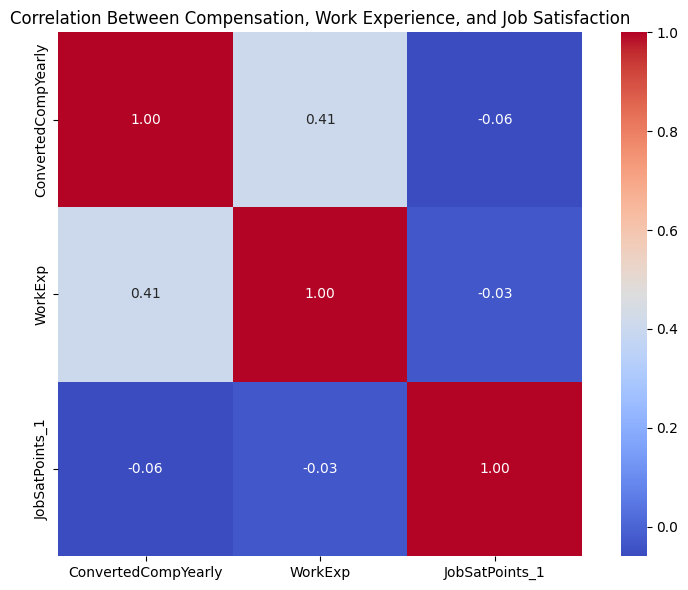

In [7]:
## Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the relevant columns
cols_of_interest = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']

# Filter dataset for rows with all non-null values in these columns
df_corr = df_no_outliers[cols_of_interest].dropna()

# Convert WorkExp to numeric if not already
df_corr['WorkExp'] = pd.to_numeric(df_corr['WorkExp'], errors='coerce')
df_corr = df_corr.dropna()

# Calculate correlation matrix
correlation_matrix = df_corr.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Between Compensation, Work Experience, and Job Satisfaction")
plt.tight_layout()
plt.show()


<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


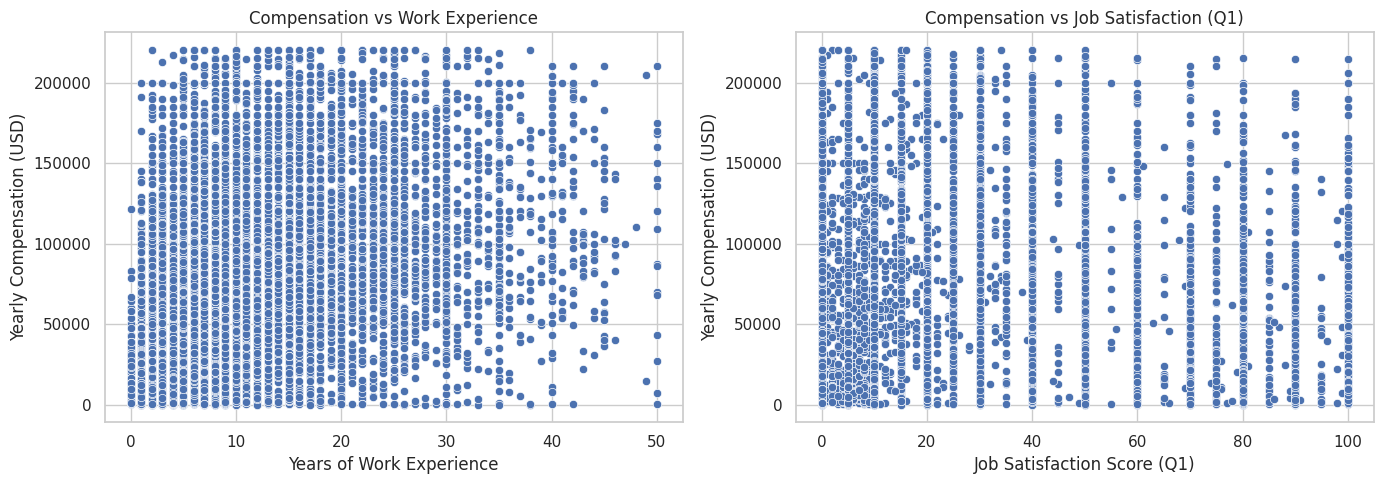

In [8]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure numeric types and drop missing values
df_scatter = df_no_outliers[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].copy()
df_scatter = df_scatter.dropna()
df_scatter['WorkExp'] = pd.to_numeric(df_scatter['WorkExp'], errors='coerce')
df_scatter['JobSatPoints_1'] = pd.to_numeric(df_scatter['JobSatPoints_1'], errors='coerce')
df_scatter = df_scatter.dropna()

# Set plot style
sns.set(style="whitegrid")

# Plot 1: Compensation vs Work Experience
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_scatter, x='WorkExp', y='ConvertedCompYearly')
plt.title("Compensation vs Work Experience")
plt.xlabel("Years of Work Experience")
plt.ylabel("Yearly Compensation (USD)")

# Plot 2: Compensation vs Job Satisfaction
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_scatter, x='JobSatPoints_1', y='ConvertedCompYearly')
plt.title("Compensation vs Job Satisfaction (Q1)")
plt.xlabel("Job Satisfaction Score (Q1)")
plt.ylabel("Yearly Compensation (USD)")

plt.tight_layout()
plt.show()


<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
